In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('20201020-vk-spb_today-accidents.csv', index_col=['id'])
df['date'] = pd.to_datetime(df['date'])

In [3]:
df = df[~df['text'].str.contains('Приложение можно скачать по ссылке ниже')]

In [5]:
df['taxi'] = df['text'].str.contains('такси', case=False, na=False)

In [6]:
df['pedestrian'] = (
    df['text'].str.contains('сбили', case=False, na=False) |
    df['text'].str.contains('сбит', case=False, na=False) |
    df['text'].str.contains('сбил', case=False, na=False) |
    df['text'].str.contains('наезд', case=False, na=False)
)

In [7]:
df['drunk'] = (
    df['text'].str.contains('сао', case=False, na=False) |
    df['text'].str.contains('алког', case=False, na=False) |
    df['text'].str.contains('пьян', case=False, na=False)
)

In [8]:
df['carsharing'] = (
    df['text'].str.contains('каршеринг', case=False, na=False) |
    df['text'].str.contains('карш', case=False, na=False) |
    df['text'].str.contains('делимобил', case=False, na=False) |
    df['text'].str.contains('youdrive', case=False, na=False) |
    df['text'].str.contains('юдра', case=False, na=False) |
    df['text'].str.contains('ю-драйв', case=False, na=False)
)

In [10]:
df.sample(3)

,text,date,comments,likes,reposts,views,attachments_count,words_count,taxi,pedestrian,drunk,carsharing,accident
id,,,,,,,,,,,,,
13691685,Каршеринг завершил аренду на встречной полосе ...,2020-08-21 13:28:00,17,46,3,71596,2,10,False,False,False,True,NaN
2356,В 13:05 08.06.2014 ДТП в Невском районе.\n\nПо...,2014-06-08 11:26:04,0,2,1,0,0,62,False,False,False,False,NaN
4589118,На перекрёстке Московского и Благодатной в сто...,2016-08-16 10:42:52,0,11,0,0,2,26,False,False,False,False,NaN


In [36]:
def sample_text(df, samples = 5):
    s = min(df.shape[0], samples)
    print(df.shape)
    for post_id, row in df.sample(s).iterrows():
        p = row['pedestrian']
        d = row['drunk']
        l = len(row['text'])
        print('_' * 100)
        print(f'{post_id} (ped: {p}; drunk: {d}; len: {l})')
        print(row['text'])
        print(row['location'])

In [12]:
df[['likes', 'reposts', 'views', 'comments']].corr()

,likes,reposts,views,comments
likes,1.000000,0.596536,0.393843,0.475756
reposts,0.596536,1.000000,0.111948,0.235208
views,0.393843,0.111948,1.000000,0.488925
comments,0.475756,0.235208,0.488925,1.000000


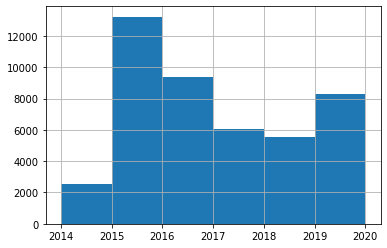

In [13]:
df['date'].dt.year.hist(bins=6)

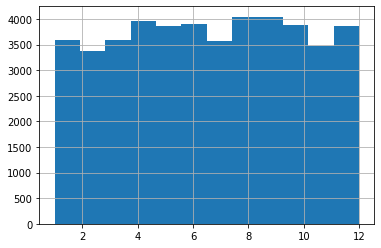

In [14]:
df['date'].dt.month.hist(bins=12)

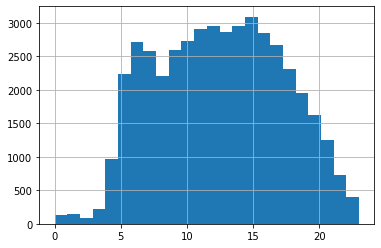

In [15]:
df['date'].dt.hour.hist(bins=24)

pedestrian
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: hour, dtype: object

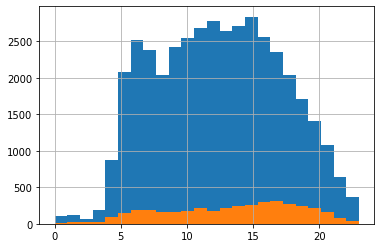

In [16]:
df['hour'] = df['date'].dt.hour
df.groupby('pedestrian')['hour'].hist(bins=24)

drunk
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: hour, dtype: object

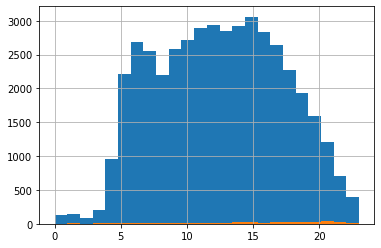

In [17]:
df['hour'] = df['date'].dt.hour
df.groupby('drunk')['hour'].hist(bins=24)

In [18]:
df['views'].describe()

count     45127.000000
mean      40591.047488
std       48446.786730
min           0.000000
25%           0.000000
50%           0.000000
75%       85085.000000
max      441214.000000
Name: views, dtype: float64

In [19]:
df.groupby('carsharing')[['likes', 'views', 'comments']].describe()

likes                                                           \
              count        mean         std   min   25%   50%    75%     max   
carsharing                                                                     
False       44390.0   44.047804   81.448255   0.0  13.0  29.0   50.0  4669.0   
True          737.0  114.614654  125.794521  20.0  50.0  75.0  121.0  1191.0   

              views                 ...                      comments  \
              count           mean  ...        75%       max    count   
carsharing                          ...                                 
False       44390.0   39468.088353  ...   84101.75  441214.0  44390.0   
True          737.0  108227.622795  ...  122053.00  275734.0    737.0   

                                                                    
                  mean         std  min   25%   50%    75%     max  
carsharing                                                          
False        26.614688   98.399035  0.0   0.0   0.0    0.0  4019.0  
True        131.107191  131.069205  0.0  53.0  90.0  170.0  1155.0  

[2 rows x 24 columns]

In [22]:
df.corr()

,comments,likes,reposts,views,attachments_count,words_count,taxi,pedestrian,drunk,carsharing,accident,hour
comments,1.000000,0.475756,0.235208,0.488925,0.185893,0.132223,0.060870,0.148788,0.035505,0.132577,NaN,0.023190
likes,0.475756,1.000000,0.596536,0.393843,0.184395,0.116123,0.045771,0.091118,0.045972,0.107962,NaN,0.030830
reposts,0.235208,0.596536,1.000000,0.111948,0.073159,0.155220,0.006687,0.119743,0.025871,0.015273,NaN,0.024597
views,0.488925,0.393843,0.111948,1.000000,0.360532,-0.020991,0.118726,0.038241,0.022976,0.179892,NaN,0.027264
attachments_count,0.185893,0.184395,0.073159,0.360532,1.000000,0.052559,0.045132,-0.007027,0.043540,0.074223,NaN,-0.009084
words_count,0.132223,0.116123,0.155220,-0.020991,0.052559,1.000000,0.010287,0.133790,0.107819,-0.022883,NaN,0.044588
taxi,0.060870,0.045771,0.006687,0.118726,0.045132,0.010287,1.000000,-0.034843,-0.001675,-0.005316,NaN,-0.003028
pedestrian,0.148788,0.091118,0.119743,0.038241,-0.007027,0.133790,-0.034843,1.000000,0.035665,-0.028725,NaN,0.052951
drunk,0.035505,0.045972,0.025871,0.022976,0.043540,0.107819,-0.001675,0.035665,1.000000,0.019651,NaN,0.034547
carsharing,0.132577,0.107962,0.015273,0.179892,0.074223,-0.022883,-0.005316,-0.028725,0.019651,1.000000,NaN,0.000471


In [23]:
sample_text(
    df[df['views'] > df['views'].quantile(0.95)]
)

(2257, 14)
____________________________________________________________________________________________________
13197316 (ped: True; drunk: False; len: 366)
ДТП на перекрестке Дачного проспекта и бульвара Новаторов в сторону КАД. Кто кого не понятно. Но синяя машина сбила женщину стоявшую у ограждения. Женщина не дожидаясь помощи покинула место ДТП. Из синей машины вышла другая женщина с грудным ребенком. Почти сразу села в другую машину и тоже покинула место ДТП вместе с ребенком. По видимому автокресла в машине нет.
____________________________________________________________________________________________________
11922790 (ped: False; drunk: False; len: 412)
В 12:00 на 82 км а/д «Кола» произошло дтп, в результате выезда на встречную полосу водителя манипуляторы Скания под управлением мужчины 1978 гр, который совершил столкновение с ВАЗ 2107 двигавшейся во встречном направлении под управлением мужчины 1954 гр.
В результате дтп Водитель лады погиб на месте. 
По факту дтп ведётся пров

## Locations

In [24]:
from natasha import (
    Segmenter,
    MorphVocab,
    
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,
    
    PER, LOC,
    NamesExtractor,

    Doc
)

In [25]:
segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

names_extractor = NamesExtractor(morph_vocab)

In [26]:
def extract_locations(text: str) -> str:
    doc = Doc(text)
    doc.segment(segmenter)
    doc.tag_ner(ner_tagger)
    doc.tag_morph(morph_tagger)
    for token in doc.tokens:
        token.lemmatize(morph_vocab)
    doc.parse_syntax(syntax_parser)
    for span in doc.spans:
        span.normalize(morph_vocab)
    return [x.normal for x in doc.spans if x.type == 'LOC']

In [27]:
def get_loc(text: str) -> str:
    locs = extract_locations(text)
    if len(locs) == 0:
        return None
#     if len(locs) > 1:
#         print(text)
#         print(locs)
#         print('')
    return locs

In [28]:
%%time

df['location'] = df['text'].apply(get_loc)
# df.sample(1000)['text'].apply(get_loc)

CPU times: user 46min 38s, sys: 3.01 s, total: 46min 41s
Wall time: 46min 43s


In [33]:
located = df[df['location'].notnull()]
located.to_csv('20201020-vk-spb_today-located.csv')

In [37]:
sample_text(
    located.sample(5)
)

(5, 15)
____________________________________________________________________________________________________
2870249 (ped: False; drunk: False; len: 209)
Энгельса,съезд с моста в сторону Меги. ГАИ нима. 9-28 пробка

Проспект Энгельса,дтп 108 маршрутка с фордом или опелем неподелили поворот к метро Парнас. ГАИ нима. на 9:28 пробка сильная.. ОПАЗДАЛ НА РАБОТУ :))
['Энгельс', 'Мега', 'Проспект Энгельс', 'Парнас']
____________________________________________________________________________________________________
10887165 (ped: False; drunk: False; len: 122)
На пересечении Маршала Говорова и Возрождения при аварии  пострадало 5 автомобилей. Образовался затор в Южном направлении.
['Возрождение', 'Южное направление']
____________________________________________________________________________________________________
2001510 (ped: True; drunk: False; len: 198)
Ищу свидетелей аварии 10 октября 2015 года ,
в 22 часа на пересечение Ветеранов и Горькавого.
Была сбита девушка, состояние девушки, т

In [59]:
locations = []
for x in df['location']:
    if x:
        locations = locations + x

df_loc = pd.DataFrame({'name': locations})
df_loc.describe()

,name
count,61560
unique,10473
top,КАД
freq,653


In [107]:
df_loc.drop(['norm'], axis=1, inplace=True)

In [142]:
df_loc.loc[:, 'norm'] = df_loc['name'].str.lower()

In [143]:
def fix_location(df, norm, samples):
    for sample in samples:
        mask = df['name'].str.contains(sample, case=False)
        df.loc[mask, 'norm'] = norm

In [144]:
fix_location(df_loc, 'Обводный канал', [
    'Обводный', 'Обводном', 'Обводным', 'Обводного',
    'Обводнова',
])

In [145]:
fix_location(df_loc, 'Московское шоссе', [
    'Московской шоссе',
    'Московское',
    'Московскм шоссе',
])

In [146]:
fix_location(df_loc, 'Московский проспект', [
    'Московский',
    'Московский пр',
    'Московское проспектов',
    'Московский просп',
])

In [152]:
df_loc[['name', 'count']].to_csv('20201020-locations.csv')

In [148]:
df_loc

,name,count,norm
0,КАД,653,кад
1,Московское шоссе,494,Московское шоссе
2,Ленинский,422,ленинский
3,Выборгское шоссе,413,выборгское шоссе
4,Софийская,407,софийская
...,...,...,...
10468,Софийское шоссе,1,софийское шоссе
10469,Толмачово-Волосово,1,толмачово-волосово
10470,Цивик Объезжайте,1,цивик объезжайте
10471,Мечникова,1,мечникова


In [147]:
df_loc['norm'].value_counts()

Обводный канал          61
Московский проспект     42
Московское шоссе        17
проспект просвещение     3
мега                     3
                        ..
павлово                  1
королла                  1
английский               1
сантьяго де куб          1
веденской                1
Name: norm, Length: 10050, dtype: int64

In [61]:
df_loc = df_loc['name'].value_counts().rename_axis('name').reset_index(name='count')

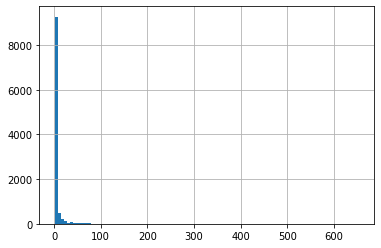

In [66]:
df_loc['count'].hist(bins=100)

In [115]:
df_loc[df_loc['count'] > 100]

,name,count,norm
0,КАД,653,NaN
1,Московское шоссе,494,NaN
2,Ленинский,422,NaN
3,Выборгское шоссе,413,NaN
4,Софийская,407,NaN
...,...,...,...
101,Московский пр,104,NaN
102,Лента,103,NaN
103,Маршал Жуков,103,NaN
104,Орджоникидзе,103,NaN
